# random variables

## objectives
By the end of the afternoon, you will be able to:
* Define a random variable
* Calculate expected values given a distribution
* Define mean, variance, and covariance
* Choose probability distributions to model things

## random variables

random variables formalize a mapping we have been implicitly using already:

$ X(s) : S\Rightarrow \Re $

* capital letters refer to random variables.
* lowercase to refer to specific realization.
* $P(X=s)$ is the probability that a draw from $X$ results in the value $s$.
* $ X \sim dist(\alpha, \beta, ...) $ means that $P(X=x)$ is defined by the function $dist$ with parameters $(\alpha, \beta, ...)$.
* "i.i.d.": If I draw from $X$ many times, all those draws are independent and identically distributed

## cumulative distribution function

$ F_X(s) = P(X \leq s) $

what kinds of bounds can we put on this function?

this works for both continuous and discrete functions.

## probability mass function / probability density function

for discrete variables:

$ f_X(s) = P(X = s)$

for continuous variables, think of it as the derivative of the CDF:

$ f_X(s)ds = P(s < X < s+ds) $

$ f_X(s) = \frac{dF_X(s)}{ds} $

## expected values

discrete:
$ E[X] = \sum\limits_{s\in S} s f_X(s) $

continuous:
$ E[X] = \int\limits_{-\infty}^{\infty}s f_X(s)ds$


a measure, but not the only one, of the central tendency of a distribution


### any function of a random variable $g(X)$

discrete: $\sum_i g(s_i)\ f_X(s_i)$

continuous: $\int g(s)\ f(s) ds$

## variance

$ Var[X] = E[(X - E[X])^2] $

a measure of the spread of a distribution

## standard deviation

$ \sigma(X) = \sqrt{Var[X]} $

useful because its units are in units of our original random variable.

## covariance  
we can also compute the covariance between two different variables:

$Cov[X,Y] = E[(X - E[X])(Y - E[Y])]$

which is related to the

## correlation

$$ Corr[X,Y] = \frac{E[(X - E[X])(Y - E[Y])]}{\sigma(X)\sigma(Y)} = \frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$$

## marginal distributions

marginal distribution takes --possibly not independent-- multivariate distribution and returns only a single dimension

accomplished by summing (discrete) or integrating (continuous)

$$
f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds
$$

## example:

![](multivariate_normal.png)

## discrete case:

|x1|x2|	x3|	x4|	py(Y)
--|--|--|--|--
y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$
y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$
px(X)|?|?|?|?|?

## conditional distributions

$$
f(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}
$$


## Anscombe's quartet

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fit(x):
    return 3+0.5*x

def anscombe():
    x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = np.array( [np.amin(x), np.amax(x) ] )
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'I', fontsize=20)

    plt.subplot(222)
    plt.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    plt.text(3,12, 'II', fontsize=20)

    plt.subplot(223)
    plt.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.text(3,12, 'III', fontsize=20)
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0,10,20))

    plt.subplot(224)

    xfit = np.array([np.amin(x4),np.amax(x4)])
    plt.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


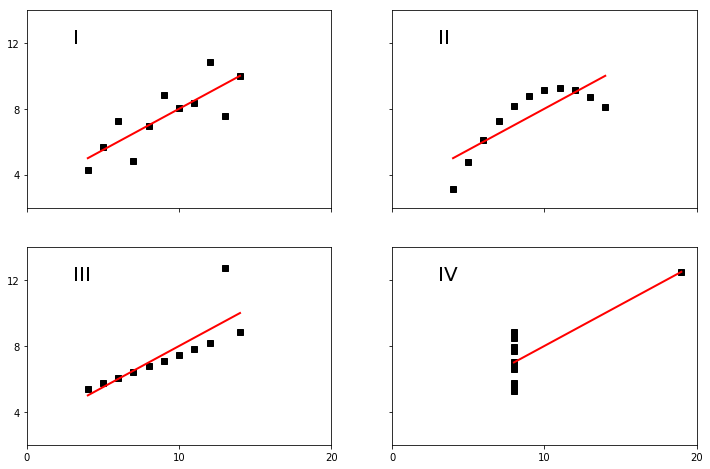

In [2]:
anscombe()

## correlation

<img src="correlation.svg" width=800 />

## distributions

* useful for modeling
* can help constrain thinking on probability questions

* useful thoughts:
    * Is data discrete or continuous?
    * Is data symmetric?
    * What limits are there on possible values for the data?
    * How likely are extreme values?

## How to use distributions in scipy

In [3]:
import scipy.stats as scs

Make a distribution object. In this case, `loc` means `mu` and `scale` means `sigma`. Examples for creating different distributions and what each parameter is called is detailed in the next section.

In [4]:
normy = scs.distributions.norm(loc=30, scale=0.02)

In [5]:
normy

To generate a random number (or "draw" or "sample") from that distribution, use the `.rvs()` method.

In [6]:
normy.rvs()

29.998459976434557

To evaluate the cumulative distribution function at a value `c`, which, remember, represents the probability of a draw being less than or equal to `c`, that is, $P(X \leq c) = F(c)$, use the `.cdf()` method.

In [7]:
normy.cdf(29.99)

0.30853753872595935

To evaluate the probability density function (only defined for continuous distributions) at `c`, use the `.pdf()` method.

In [8]:
normy.pdf(29.99)

17.603266338214286

- Remember: this is not a probability. It may be greater than 1. It is a probability _density_. Probabilities are _areas_ under the pdf curve, which you could get by integrating. The cumulative distribution function is the integral of the probability density function, so if you want a probability, you want to use the `.cdf()` method.

To evaluate the probability mass function (only defined for discrete distributions) at `c`, use the `.pmf()` method..

In [9]:
binom_dist = scs.distributions.binom(n=13, p=0.3)

In [10]:
binom_dist.pmf(5)

0.1802889629540994

- This _is_ a probability: the probability that a draw from this discrete random variable would yield the value 5. 

`binom_dist.cdf(5)` would return the probability that a draw from this discrete random variable would yield a value _less than or equal to_ 5. Don't mix these up.

In [11]:
binom_dist.cdf(5)

0.8346025236556

The inverse of the CDF is implemented as `.ppf()`. Say you wanted the value at which the CDF evaluated to 0.08.

In [12]:
normy.ppf(0.08)

29.971898568793808

This tells us that the probability of getting a draw less than `29.971899` is $8\%$ (where, again, our input was the probability, and the output was the value.)

## common distributions

* Bernoulli
* binomial
* geometric
* Poisson
* exponential
* uniform
* Gaussian
* t-distribution
* gamma
* [more distributions](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)

## Bernoulli:

$X \in \{0,1\}$

$P(success) = P(X = 1) = p$

$P(failure)= P(X = 0) = 1-p $

mean: $ E[X] = p $

variance: $ Var(X) = p(1-p) $

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
def plot_pmf(dist, x):
    plt.scatter(x, dist.pmf(x),
               edgecolor='k')
    plt.vlines(x, 0, 
               dist.pmf(x),
               linestyle=':')
    plt.ylim(bottom=0)
    plt.xlabel('x')
    plt.ylabel('P(x)')

def plot_pdf(dist, x):
    plt.plot(x, dist.pdf(x))
    plt.ylim(bottom=0)
    plt.xlabel('x')
    plt.ylabel('pdf')

## binomial:  probability of k successes in n trials
pmf: $P(X=k) = {n \choose k}p^k(1-p)^{n-k}, \forall k \in \{0, 1,..., n\} $

$E[X] = np$

$Var(X) = np(1-p)$


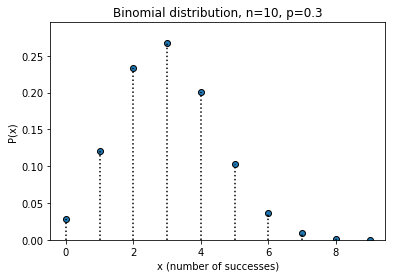

In [15]:
n, p = (10, 0.3)
binom = scs.distributions.binom(n=n,p=p)
x = np.arange(0, 10, 1)
plot_pmf(binom, x)
plt.title('Binomial distribution, n={}, p={}'.format(n,p))
plt.xlabel('x (number of successes)');

In [16]:
binom.pmf(11)

0.0

In [17]:
5.9 * (10**-6)

5.9e-06

In [18]:
binom.cdf(4)

0.8497316674

In [19]:
binom.rvs(size=10)

array([5, 5, 5, 4, 4, 3, 3, 2, 3, 3])

In [20]:
#scs.distributions.binom?

In [21]:
binom.ppf(.9)

5.0

In [22]:
binom.cdf(5)

0.9526510126

In [23]:
binom.cdf(1)

0.1493083459

In [24]:
binom.cdf(0)

0.028247524899999984

## geometric:  probability of k trials with only the final trial succeeding
pmf: $$ P(X=k) = p (1-p)^{k-1}, \forall k \in \{1, 2,...\}$$

$E[X] = \frac{1}{p} $

$ Var(X) = \frac{1-p}{p^2} $

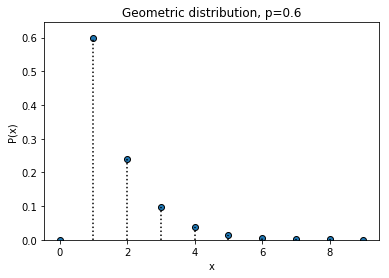

In [25]:
p = 0.6
geom = scs.distributions.geom(p=p)
x = np.arange(0, 10, 1)
plot_pmf(geom, x)
plt.title('Geometric distribution, p={}'.format(p));

In [26]:
geom.rvs()

1

## Poisson: probability of k occurrences in a fixed time interval

pmf: $$P(X=k) = \frac{\lambda^k e^{-\lambda}}{k!},\forall k \in \{0,1,2,...\}$$

$E[X] = \lambda $

$Var(X) =  \lambda $

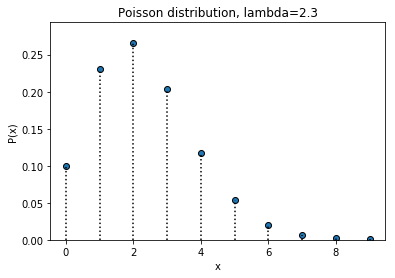

In [27]:
lam = 2.3
# what we call lambda here, scipy calls mu
pois = scs.distributions.poisson(mu=lam)
x = np.arange(0, 10, 1)
plot_pmf(pois, x)
plt.title('Poisson distribution, lambda={}'.format(lam));

## uniform (discrete): equal probability of generating an integer between $a$ and $b$ (inclusive)

pmf: $$ P(X=k) = \frac{1}{b-a + 1}, \forall k\in[a, b], \text{0 otherwise} $$

$E[X] =  \frac{a+b}{2} $

$Var(X) = \frac{(b-a+1)^2 - 1}{12}$

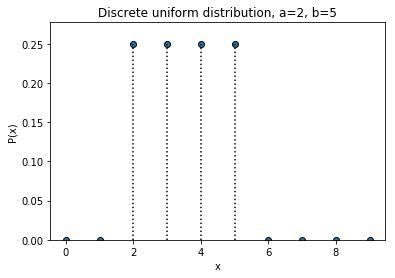

In [28]:
a, b = (2, 5)
unif_d = scs.randint(a,b+1)
x = np.arange(0, 10, 1)
plot_pmf(unif_d, x)
plt.title('Discrete uniform distribution, a={}, b={}'.format(a,b));

## uniform (continuous): equal probability of drawing any real number between $a$ and $b$ (inclusive)

pdf: $ f(x) = \frac{1}{b-a}, \forall x\in[a, b], \text{0 otherwise} $

$E[X] = \frac{a+b}{2} $

$Var(X)=  \frac{(b-a)^2}{12}$

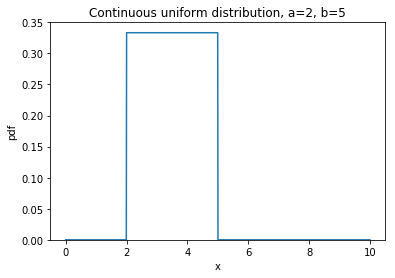

In [29]:
a, b = (2, 5)
# scipy takes 'loc' as the lower bound and 'scale' as the width
unif = scs.distributions.uniform(loc=a, scale=b-a)
x = np.linspace(0, 10, 1000)
plot_pdf(unif, x)
plt.title('Continuous uniform distribution, a={}, b={}'.format(a,b));

## exponential: distribution of "wait time until event happens"

cdf: $ P(X < t) = 1 - e^{-\lambda t}, t \ge 0, \lambda \ge 0 $

pdf: $ f(t) = \lambda e^{-\lambda t} $

$E[X] =  \frac{1}{\lambda} $

$Var(X)= \frac{1}{\lambda^2} $

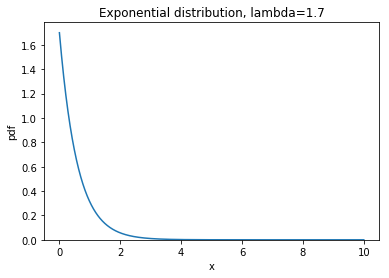

In [30]:
lam_e = 1.7
# lambda here gets inverted and passed to scipy as 'scale'
expo = scs.distributions.expon(scale=1./lam_e)
x = np.linspace(0, 10, 1000)
plot_pdf(expo, x)
plt.title('Exponential distribution, lambda={}'.format(lam_e));

## Gaussian

(also called normal)

pdf: $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $$

$E[X] = \mu$

$Var(X) =  \sigma^2 $

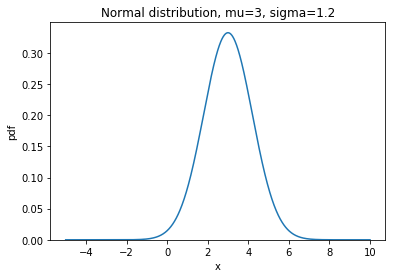

In [31]:
mu, sig = 3, 1.2
# scipy takes the means as 'loc' and the standard deviation as 'scale'
normal = scs.distributions.norm(loc=mu, scale=sig)
x = np.linspace(-5, 10, 1000)
plot_pdf(normal, x)
plt.title('Normal distribution, mu={}, sigma={}'.format(mu, sig));

## students-t

pdf: $$f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}\left(1+\frac{x^2}{\nu}\right)^{-\frac{\nu+1}{2}}$$ 
$\nu$ is degrees of freedom

$E[X] =  0$  

$Var(X) = \frac{\nu}{\nu-2}$ for $\nu \gt 2$, $\infty$ for $1 \lt \nu \le 2$, otherwise undefined

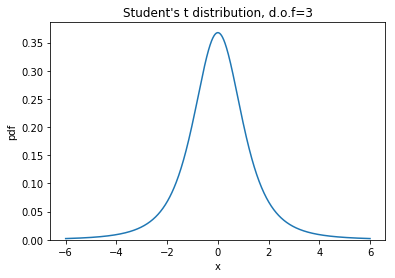

In [32]:
degrees_of_freedom = 3
# scipy takes this parameter as 'df'
student_t = scs.distributions.t(df=degrees_of_freedom)
x = np.linspace(-6, 6, 1000)
plot_pdf(student_t, x)
plt.title("Student's t distribution, d.o.f={}".format(degrees_of_freedom));

## gamma: kinda like the normal but for strictly non-negative things

pdf: $$ f(x) = \frac{\theta^{-k} x^{k-1} e^{-x/\theta}}{\Gamma(k)}, x \gt 0$$

$E[X] = k\theta$

$Var(X) = k \theta^2$

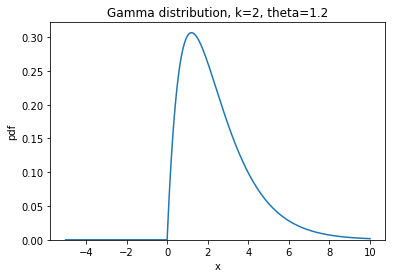

In [33]:
k, theta = 2,1.2
# scipy calls k 'a' and wants theta in 'scale'
gamma = scs.distributions.gamma(a=k, scale=theta)
x = np.linspace(-5, 10, 1000)
plot_pdf(gamma, x)
plt.title("Gamma distribution, k={}, theta={}".format(k, theta));